# **Exploratory Data Analysis**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
!pip install -U gdown

In [ ]:
!gdown --id 1D1dZRAQFmt4eiyRTxGPgkTZ0LlJWQOVg

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1D1dZRAQFmt4eiyRTxGPgkTZ0LlJWQOVg
To: /content/ObesityDataSet.csv
100% 261k/261k [00:00<00:00, 82.7MB/s]


In [ ]:
df = pd.read_csv('ObesityDataSet.csv')

In [ ]:
print("5 Data Pertama")
print(df.head())

5 Data Pertama
  Age  Gender Height Weight        CALC FAVC FCVC NCP  SCC SMOKE CH2O  \
0  21  Female   1.62     64          no   no    2   3   no    no    2   
1  21  Female   1.52     56   Sometimes   no    3   3  yes   yes    3   
2  23    Male    1.8     77  Frequently   no    2   3   no    no    2   
3  27    Male    1.8     87  Frequently   no    3   3   no    no    2   
4  22    Male   1.78   89.8   Sometimes   no    2   1   no    no    2   

  family_history_with_overweight FAF TUE       CAEC                 MTRANS  \
0                            yes   0   1  Sometimes  Public_Transportation   
1                            yes   3   0  Sometimes  Public_Transportation   
2                            yes   2   1  Sometimes  Public_Transportation   
3                             no   2   0  Sometimes                Walking   
4                             no   0   0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        Normal_Weight  
2 

In [ ]:
print("\nInformasi Dataset")
print(df.info())


Informasi Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                          

In [ ]:
print("\nStatistik Deskriptif")
print(df.describe(include='all'))


Statistik Deskriptif
         Age Gender Height Weight       CALC  FAVC  FCVC   NCP   SCC SMOKE  \
count   2097   2102   2099   2100       2106  2100  2103  2099  2101  2106   
unique  1394      3   1562   1518          5     3   808   637     3     3   
top       18   Male    1.7     80  Sometimes   yes     3     3    no    no   
freq     124   1056     58     58       1386  1844   647  1183  1997  2054   

        CH2O family_history_with_overweight   FAF   TUE       CAEC  \
count   2105                           2098  2103  2102       2100   
unique  1263                              3  1186  1130          5   
top        2                            yes     0     0  Sometimes   
freq     441                           1705   404   552       1747   

                       MTRANS      NObeyesdad  
count                    2105            2111  
unique                      6               7  
top     Public_Transportation  Obesity_Type_I  
freq                     1572             35

In [ ]:
print("\nJumlah Missing Value")
print(df.isnull().sum())


Jumlah Missing Value
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


In [ ]:
print("\nJumlah Data Duplikat")
print(df.duplicated().sum())


Jumlah Data Duplikat
18


# **Visualisasi**

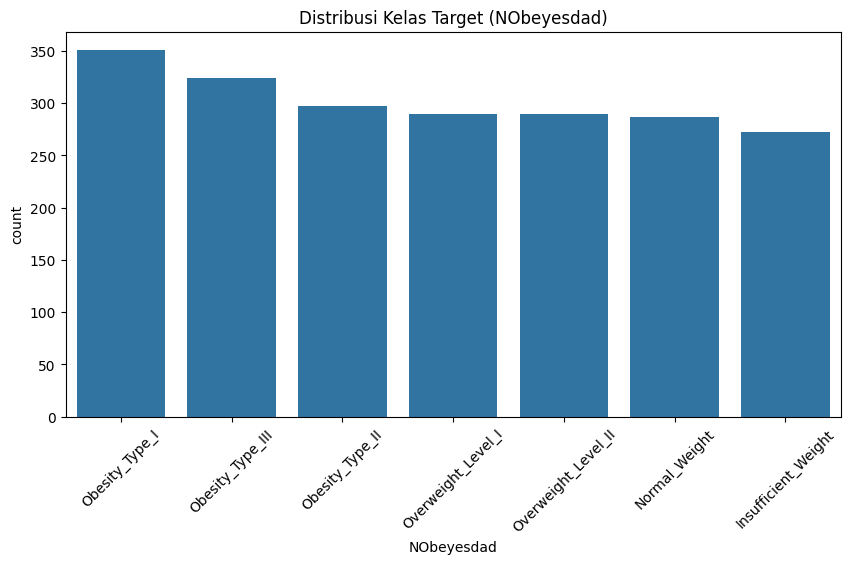

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribusi Kelas Target (NObeyesdad)')
plt.show()

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

# **Preprocessing Data**

In [ ]:
print("Missing values:")
print(df.isnull().sum())

df = df.drop_duplicates()

for col in ['Age', 'Height', 'Weight']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.dropna(subset=['Age', 'Height', 'Weight'], inplace=True)


def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

for col in ['Age', 'Height', 'Weight']:
    df = remove_outliers_iqr(df, col)

print("\nMissing values after handling:")
print(df.isnull().sum())

Missing values:
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64

Missing values after handling:
Age                                0
Gender                             9
Height                             0
Weight                             0
CALC                               5
FAVC                              10
FCVC                               7
NCP                               10
SCC           

<ipython-input-58-216931620>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
<ipython-input-58-216931620>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Age', 'Height', 'Weight'], inplace=True)


# **Encoding Kategorikal**

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_encoded = df.copy()

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

X = df_encoded.drop('NObeyesdad', axis=1)
y = df_encoded['NObeyesdad']

print("\nDistribusi kelas setelah encoding:")
print(y.value_counts())


Distribusi kelas setelah encoding:
NObeyesdad
4    305
2    271
1    267
3    257
0    253
5    244
6    234
Name: count, dtype: int64


# **Handling Imbalance dan Normalisasi**

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_resampled)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

for name, model in models.items():
    print(f"\nModel: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


Model: Logistic Regression

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.79      0.74        66
           1       0.51      0.31      0.39        67
           2       0.61      0.74      0.67        53
           3       0.85      0.93      0.89        67
           4       0.95      1.00      0.98        63
           5       0.62      0.61      0.62        57
           6       0.60      0.59      0.60        54

    accuracy                           0.71       427
   macro avg       0.69      0.71      0.70       427
weighted avg       0.70      0.71      0.70       427


Model: Random Forest

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.89      0.94        66
           1       0.81      0.90      0.85        67
           2       0.98      0.96      0.97        53
           3       1.00      0.99      0.99        67
           4       1.00      1.00 

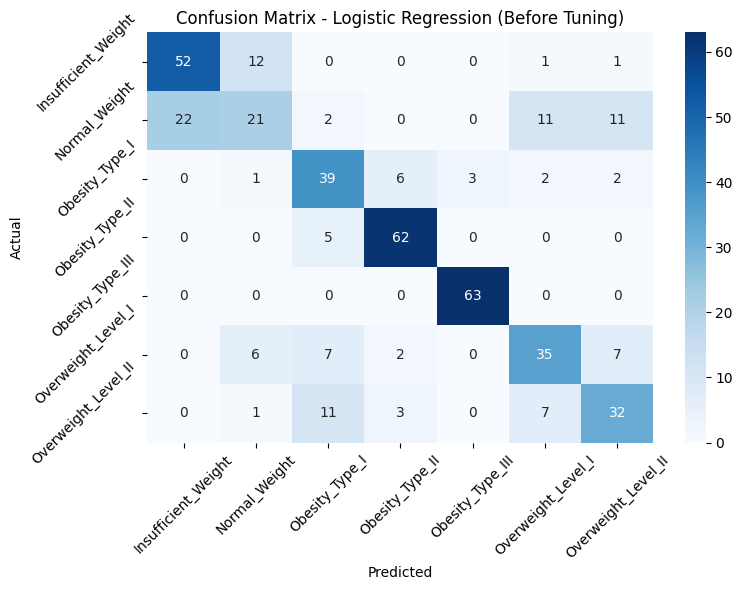

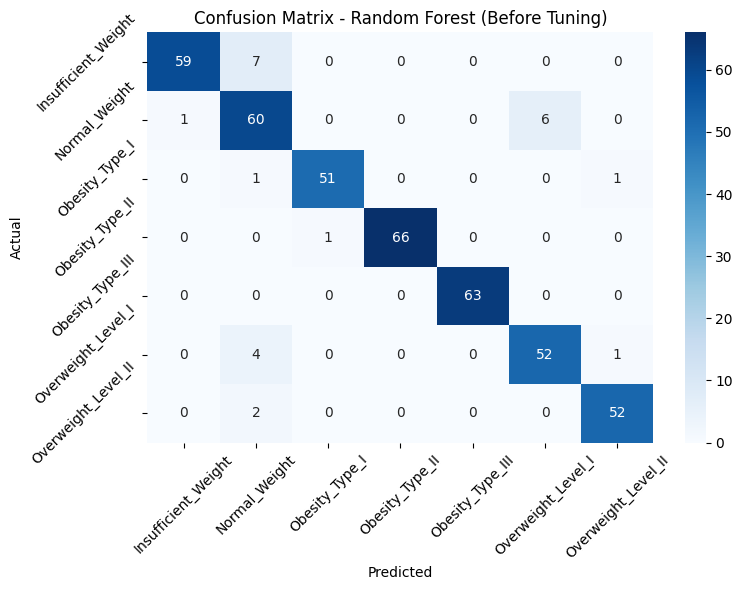

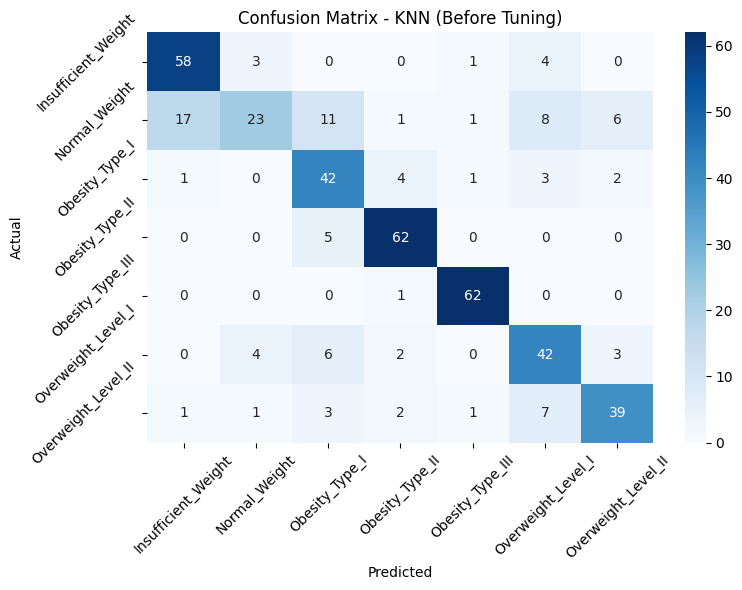

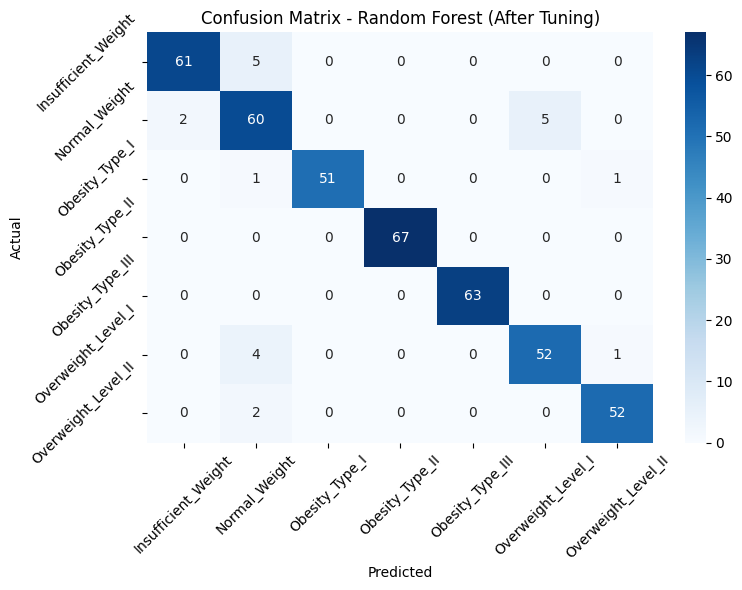

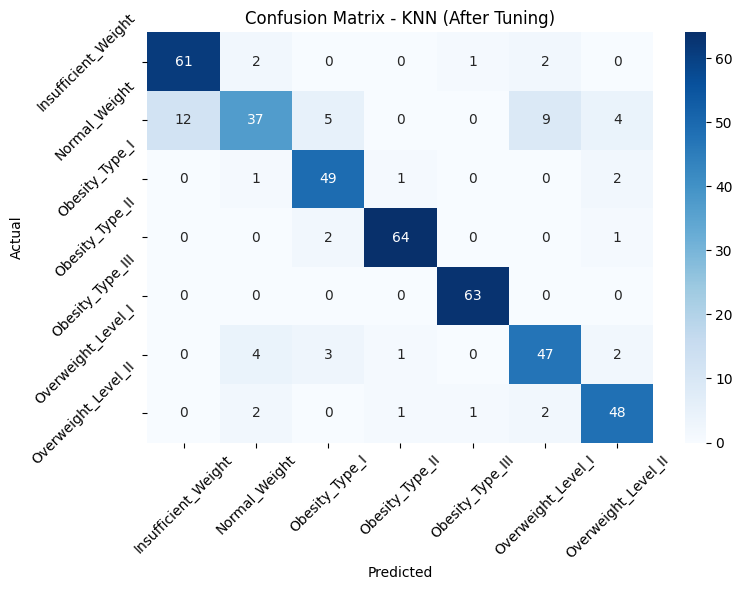

In [ ]:
def plot_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    labels = sorted(df['NObeyesdad'].unique())

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(models['Logistic Regression'], X_test, y_test, 'Logistic Regression (Before Tuning)')
plot_confusion_matrix(models['Random Forest'], X_test, y_test, 'Random Forest (Before Tuning)')
plot_confusion_matrix(models['KNN'], X_test, y_test, 'KNN (Before Tuning)')

plot_confusion_matrix(best_rf, X_test, y_test, 'Random Forest (After Tuning)')
plot_confusion_matrix(best_knn, X_test, y_test, 'KNN (After Tuning)')


## **Visualisasi Model**

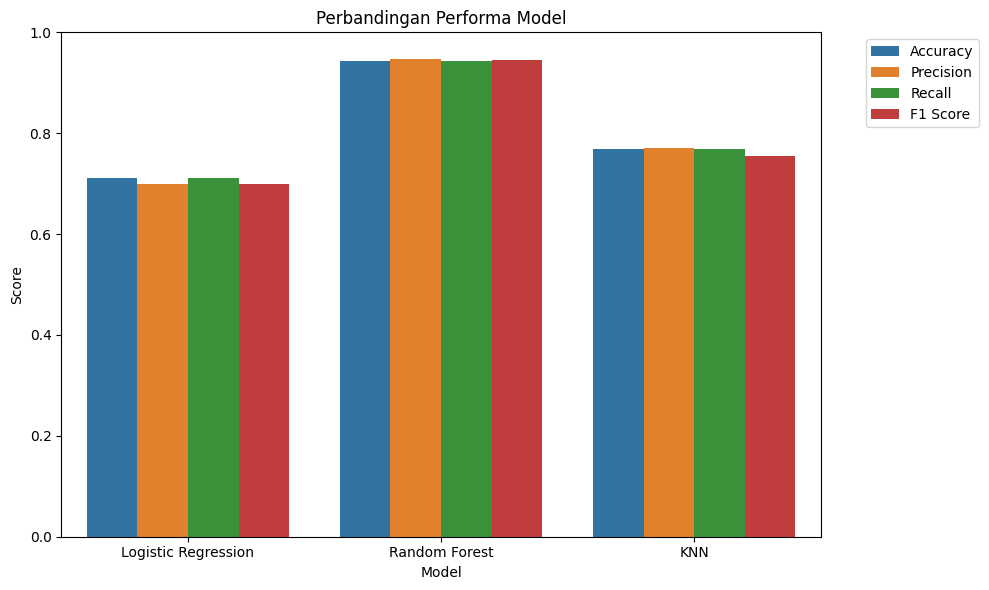

In [ ]:
model_scores = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    model_scores['Model'].append(name)
    model_scores['Accuracy'].append(accuracy_score(y_test, y_pred))
    model_scores['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
    model_scores['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
    model_scores['F1 Score'].append(f1_score(y_test, y_pred, average='weighted'))

score_df = pd.DataFrame(model_scores)


plt.figure(figsize=(10, 6))
score_df_melted = score_df.melt(id_vars='Model', var_name='Metric', value_name='Score')
sns.barplot(data=score_df_melted, x='Model', y='Score', hue='Metric')
plt.title('Perbandingan Performa Model')
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## **Hyperparameter Tuning**

In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='f1_weighted', n_jobs=-1)
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("Best Parameters - Random Forest:")
print(grid_rf.best_params_)
print("\nClassification Report (Tuned Random Forest):")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

Best Parameters - Random Forest:
{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150}

Classification Report (Tuned Random Forest):
              precision    recall  f1-score   support

           0       0.97      0.92      0.95        66
           1       0.83      0.90      0.86        67
           2       1.00      0.96      0.98        53
           3       1.00      1.00      1.00        67
           4       1.00      1.00      1.00        63
           5       0.91      0.91      0.91        57
           6       0.96      0.96      0.96        54

    accuracy                           0.95       427
   macro avg       0.95      0.95      0.95       427
weighted avg       0.95      0.95      0.95       427



In [ ]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1: Manhattan, 2: Euclidean
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='f1_weighted', n_jobs=-1)
grid_knn.fit(X_train, y_train)

best_knn = grid_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

print("Best Parameters - KNN:")
print(grid_knn.best_params_)
print("\nClassification Report (Tuned KNN):")
print(classification_report(y_test, y_pred_knn))

Best Parameters - KNN:
{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

Classification Report (Tuned KNN):
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        66
           1       0.80      0.55      0.65        67
           2       0.83      0.92      0.88        53
           3       0.96      0.96      0.96        67
           4       0.97      1.00      0.98        63
           5       0.78      0.82      0.80        57
           6       0.84      0.89      0.86        54

    accuracy                           0.86       427
   macro avg       0.86      0.87      0.86       427
weighted avg       0.86      0.86      0.86       427



In [ ]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr,
                       cv=3, scoring='f1_weighted', n_jobs=-1)
grid_lr.fit(X_train, y_train)

best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)

from sklearn.metrics import classification_report
print("Best Parameters - Logistic Regression:")
print(grid_lr.best_params_)
print("\nClassification Report (Tuned Logistic Regression):")
print(classification_report(y_test, y_pred_lr))

Best Parameters - Logistic Regression:
{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}

Classification Report (Tuned Logistic Regression):
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        66
           1       0.83      0.66      0.73        67
           2       0.81      0.79      0.80        53
           3       0.91      0.94      0.93        67
           4       0.98      1.00      0.99        63
           5       0.68      0.75      0.72        57
           6       0.76      0.76      0.76        54

    accuracy                           0.84       427
   macro avg       0.83      0.83      0.83       427
weighted avg       0.84      0.84      0.84       427



## **Visualisasi Hasil Tuning**

<ipython-input-69-1361370304>:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=score_melted, x='Model', y='Score', hue='Stage', palette='Set2', ci=None)


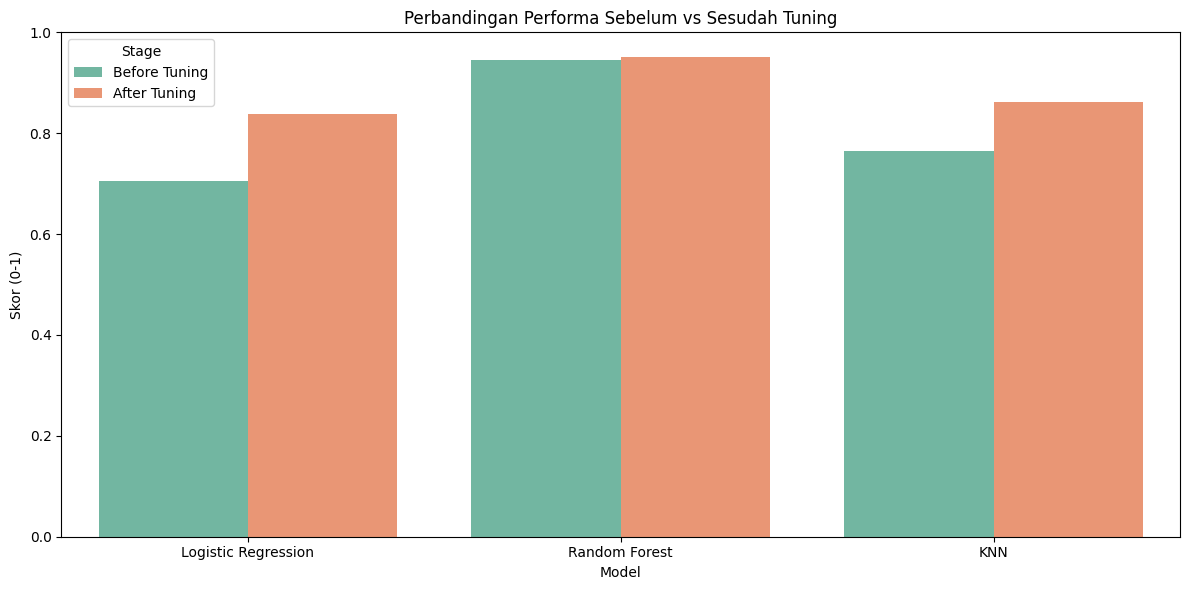

In [ ]:
def get_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    }

comparison_scores = {
    'Model': [],
    'Stage': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

for name, model in models.items():
    metrics = get_metrics(model, X_test, y_test)
    comparison_scores['Model'].append(name)
    comparison_scores['Stage'].append('Before Tuning')
    comparison_scores['Accuracy'].append(metrics['Accuracy'])
    comparison_scores['Precision'].append(metrics['Precision'])
    comparison_scores['Recall'].append(metrics['Recall'])
    comparison_scores['F1 Score'].append(metrics['F1 Score'])

tuned_models = {
    'Random Forest': best_rf,
    'KNN': best_knn,
    'Logistic Regression': best_lr
}

for name, model in tuned_models.items():
    metrics = get_metrics(model, X_test, y_test)
    comparison_scores['Model'].append(name)
    comparison_scores['Stage'].append('After Tuning')
    comparison_scores['Accuracy'].append(metrics['Accuracy'])
    comparison_scores['Precision'].append(metrics['Precision'])
    comparison_scores['Recall'].append(metrics['Recall'])
    comparison_scores['F1 Score'].append(metrics['F1 Score'])

score_compare_df = pd.DataFrame(comparison_scores)

plt.figure(figsize=(12, 6))
score_melted = score_compare_df.melt(id_vars=['Model', 'Stage'], var_name='Metric', value_name='Score')

sns.barplot(data=score_melted, x='Model', y='Score', hue='Stage', palette='Set2', ci=None)
plt.title('Perbandingan Performa Sebelum vs Sesudah Tuning')
plt.ylim(0, 1)
plt.xlabel('Model')
plt.ylabel('Skor (0-1)')
plt.legend(title='Stage')
plt.tight_layout()
plt.show()


In [ ]:
!jupyter nbconvert --to script Capstone_Project_14855.ipynb

[NbConvertApp] WARNING | pattern 'Capstone_Project_14855.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--

## **Kesimpulan**

1. Dataset yang digunakan memiliki 2111 data dengan 17 fitur dan 1 target yang merepresentasikan tingkat obesitas pada individu dari Meksiko, Peru, dan Kolombia
2. Dataset memiliki distribusi kelas target yang tidak seimbang dan terdapat outlier pada kolom Weight, Height, dan Age
3. Algoritma Random Forest dan KNN mendapatkan performa yang lebih tinggi dibanding Logistic Regression
4. Hyperparameter Tuning dibutuhkan agar performa model dapat ditingkatkan, khususnya pada Random Forest dan KNN